In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import pickle as pkl

from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
path_data='/om2/user/khrovati/data/cross_system_integration/'
path_names=path_data+'names_parsed/'
path_embed=path_data+'eval/pancreas_conditions_MIA_HPAP2/integration_summary/moransi/'
path_fig=path_data+'figures/'

In [3]:
model_map=pkl.load(open(path_names+'models.pkl','rb'))

In [4]:
# Load embeddings and sort+rename for plotting
embeds=pkl.load(open(path_embed+'pancreas_STZG1_healthyvar_topmodels.pkl','rb'))
embeds={parsed:embeds[name] for name,parsed in model_map.items()}

In [7]:
# gene group score columns
scores=[c for c in embeds['Non-integrated'].obs.columns if 'gene_score' in c]

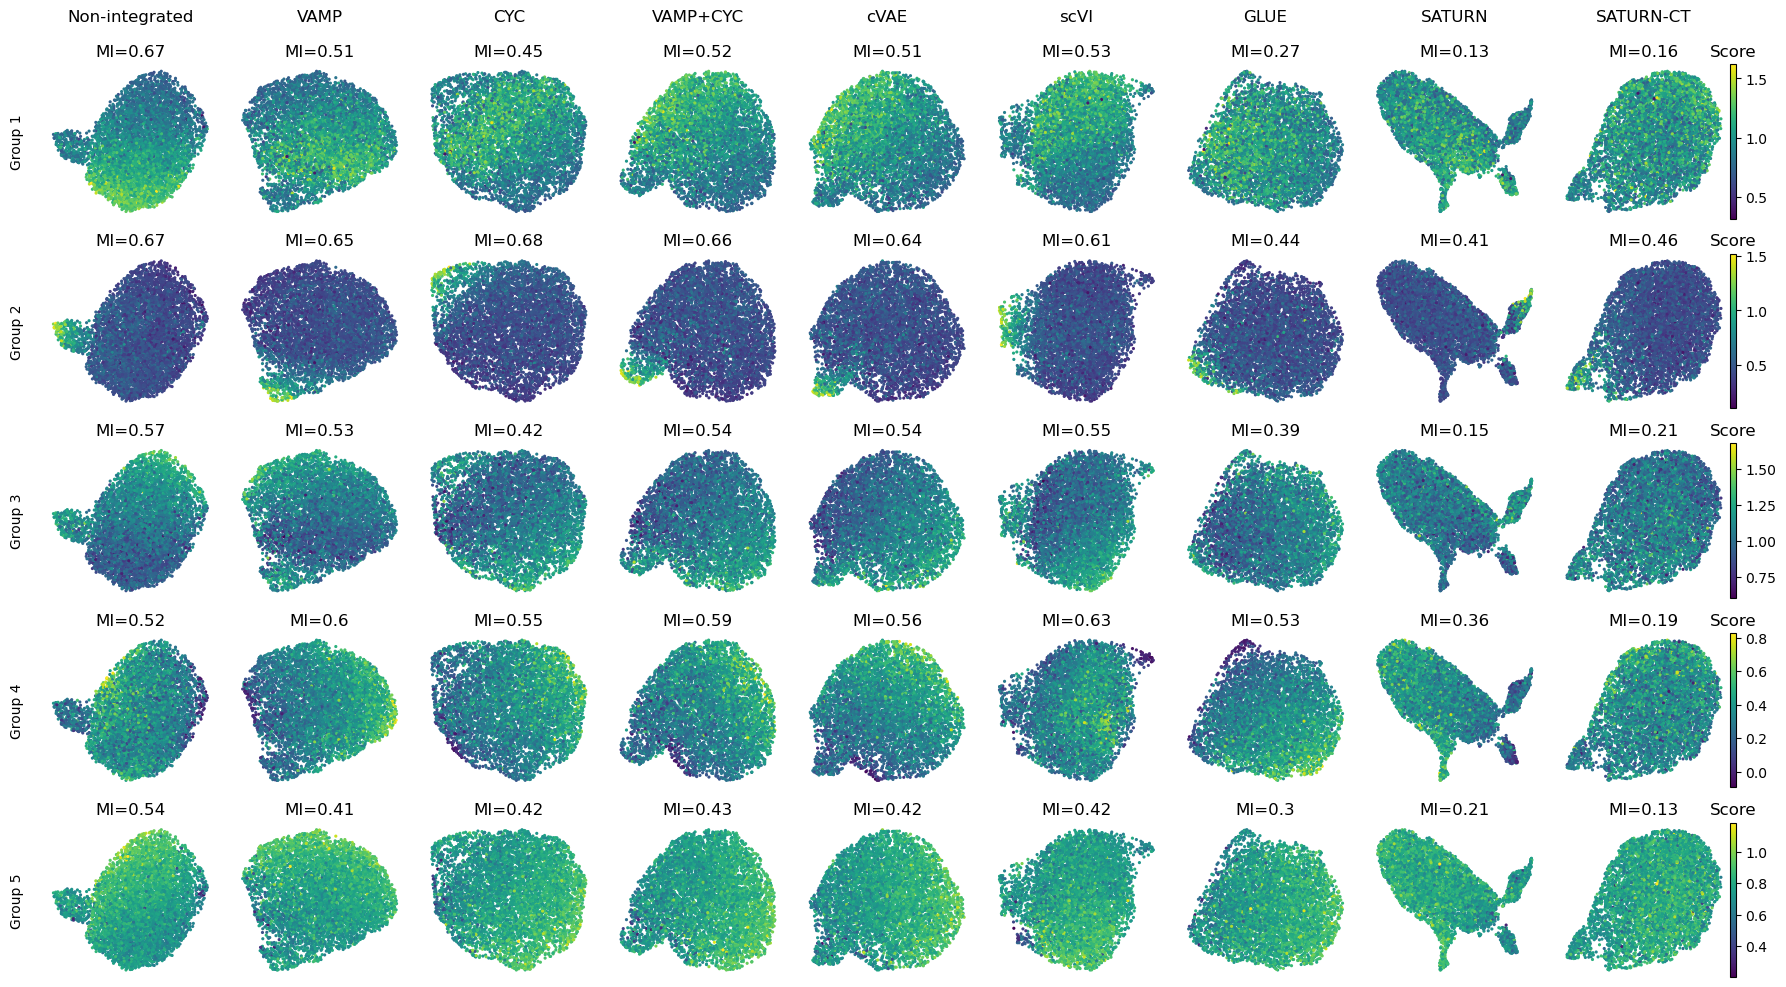

In [8]:
# Make figure
nrows=len(scores)
ncols=len(embeds)
fig,axs=plt.subplots(nrows,ncols,figsize=(2*ncols,2*nrows))
for col,(model,embed) in enumerate(embeds.items()):
    for row,score in enumerate(scores):
        # Plot
        ax=axs[row,col]
        mi=embed.uns['moransi'][score]
        title=f'MI={round(mi,2)}'
        if row==0:
            title=model+'\n\n'+title
        sc.pl.umap(embed,color=score,sort_order=False,ax=ax,show=False,
                   title=title,
                  frameon=False)
        # Set titles/labels
        if col==0:
            ax.axis('on')
            ax.tick_params(
                top='off', bottom='off', left='off', right='off', 
                labelleft='on', labelbottom='off')
            ax.set_ylabel(score.replace('gene_score_cluster_','Group ')+'\n', rotation=90)
            ax.set_xlabel('')
            ax.set(frame_on=False)
# Remove repeated cmaps
rightmost=max([ax.get_position().x0 for ax in fig.axes])
for ax in fig.axes:
    if ax.get_label()=='<colorbar>' and ax.get_position().x0!=rightmost:
        ax.remove()
    elif ax.get_label()=='<colorbar>':
        ax.set_title('Score')

fig.set(facecolor = (0,0,0,0))
fig.tight_layout()

# Save 
plt.savefig(path_fig+'moransi_example-pancreas_STZG1_healthyvar-umap.pdf',
            dpi=300,bbox_inches='tight')
plt.savefig(path_fig+'moransi_example-pancreas_STZG1_healthyvar-umap.png',
            dpi=300,bbox_inches='tight')